In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random
from tabulate import tabulate

In [2]:
%run -i ./Classes.ipynb

# Embed, Attack, Extract

In [3]:
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 256
logo_size = 20

my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

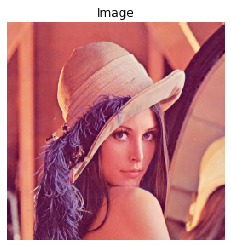

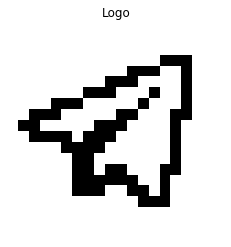

In [4]:
ImageUtil.show1(my_image.image, 'Image', 4)
ImageUtil.show1(my_logo.logo, 'Logo', 4)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 31.934682827043638


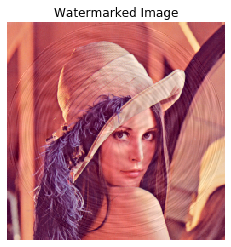

In [5]:
riw = RIW(image_size, logo_size, logo_size * 2, 0.5, 20)
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)
w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, 'Watermarked Image')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


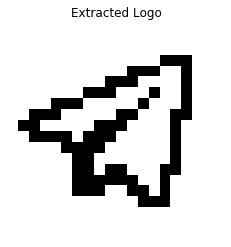

In [6]:
logo_extracted = riw.extract(w_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_extracted)))

ImageUtil.show1(logo_extracted, 'Extracted Logo')

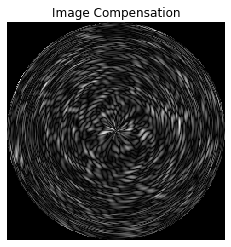

In [7]:
ImageUtil.show1(riw.img_compensation, 'Image Compensation')

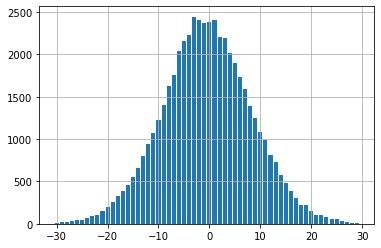

In [9]:
# Histogram of Compensation Image

fig_histogram = plt.figure()
histogram_data = riw.img_compensation.flatten()
histogram_data = histogram_data[histogram_data != 0]
(yaxis, xaxis) = np.histogram(histogram_data, bins=np.linspace(-30, 30, 61))
xaxis = xaxis[0:len(yaxis)]
plt.bar(xaxis, yaxis)
plt.grid()
plt.show()

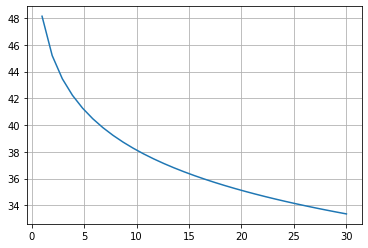

In [5]:
# Graph of PSNR

fig_psnr = plt.figure()
xaxis_psnr = np.linspace(1, 30, 31)
plt.plot(xaxis_psnr, 10 * np.log10(255 ** 2 / xaxis_psnr))
plt.grid()
plt.show()

In [21]:
my_mse = 10 * np.log10(255 ** 2) - 40
print(my_mse)
print(10 ** (my_mse / 10))
print(np.sqrt(10 ** (my_mse / 10)))

8.130803608679102
6.502499999999999
2.55


In [16]:
10 * np.log10(6.502499999999999)

8.130803608679102

In [22]:
np.sqrt(6.5)

2.5495097567963922

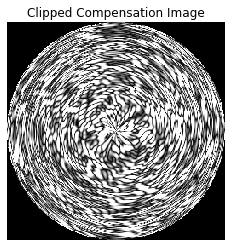

In [10]:
imc = np.copy(riw.img_compensation)
imc_mean = np.mean(imc)
radius = 10
imc = np.clip(imc, imc_mean - radius, imc_mean + radius)

ImageUtil.show1(imc, 'Clipped Compensation Image')

PSNR = 32.621903251003495


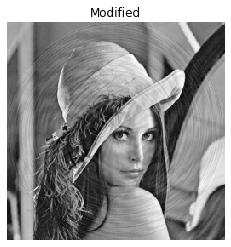

In [11]:
img_mod = my_image.get_y() + imc

print('PSNR = {}'.format(ImageUtil.psnr(my_image.get_y(), img_mod)))

ImageUtil.show1(img_mod, 'Modified')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


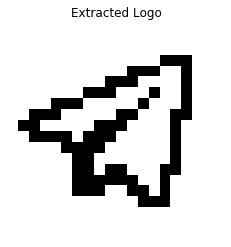

In [12]:
logo_mod = riw.extract(img_mod)

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_mod)))

ImageUtil.show1(logo_mod, 'Extracted Logo')

In [13]:
def multiple_attack(image):
    attacked_image = np.copy(image)
    attacked_image = Attacker.attackFilterGauss(attacked_image, 3)
    attacked_image = Attacker.attackNoiseSaltPepper(attacked_image, 0.01)
    attacked_image = Attacker.attackJPG(attacked_image, 90)
    attacked_image = Attacker.attackRotate(attacked_image, 5)
    attacked_image = Attacker.attackCrop(attacked_image, 0.03, 0.03, 0.03, 0.03)
    return attacked_image

In [14]:
def test_anti_psnr(radius):
    imc = np.copy(riw.img_compensation)
    imc_mean = np.mean(imc)
    imc = np.clip(imc, imc_mean - radius, imc_mean + radius)
    
    img_mod = my_image.get_y() + imc
    my_image_copy = Image.copy(my_image)
    my_image_copy.set_y(img_mod)
    psnr = ImageUtil.psnr(my_image.image, my_image_copy.image)
    
    logo_mod = riw.extract(img_mod)
    ber = ImageUtil.ber(my_logo.logo, logo_mod)
    
    attacked_image = Image(multiple_attack(my_image_copy.image), image_size)
    
    logo_attack = riw.extract(attacked_image.get_y())
    ber_2 = ImageUtil.ber(my_logo.logo, logo_attack)
    
    return (i, psnr, ber, ber_2, my_image_copy)

In [16]:
apsnr = []
psnr_images = []
for radius in [3, 6, 9, 12, 15, 18, 21]:
    (radius, psnr, ber, ber_2, image) = test_anti_psnr(radius)
    apsnr.append((radius, psnr, ber, ber_2))
    psnr_images.append((radius, image))

print(tabulate(apsnr, headers=['Limit', 'PSNR', 'BER_1', 'BER_2']))

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  Limit     PSNR    BER_1    BER_2
-------  -------  -------  -------
      3  40.2436   0.2625   0.28
      3  35.4336   0.1675   0.245
      3  33.0832   0.0075   0.2025
      3  31.7841   0        0.1575
      3  31.3686   0        0.1325
      3  32.1238   0        0.12
      3  31.8435   0        0.125


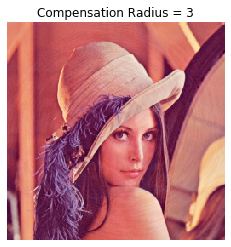

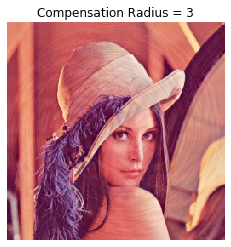

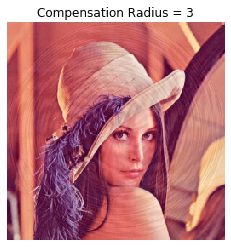

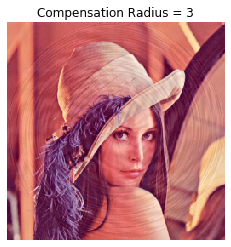

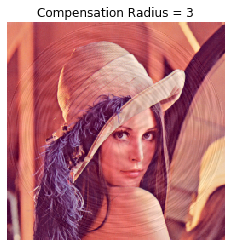

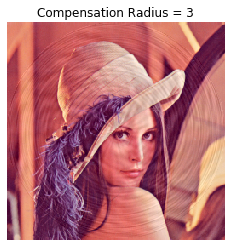

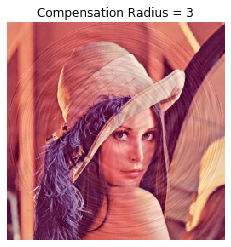

In [18]:
for pair in psnr_images:
    (radius, image) = pair
    ImageUtil.show1(image.image, 'Compensation Radius = {}'.format(radius))